<a href="https://colab.research.google.com/github/sahashivali/Customer-Churn-Prediction-in-the-Telecom-Industry/blob/main/Telecom_Industry_Customer_Churn_Final_Year_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings("ignore")

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#load the dataset
df = pd.read_csv("telecom_customer_churn.csv")
#making a copy for further usecase
df1 = df.copy()
#cf = df.copy()

In [ ]:
#Top 5 row
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,7043.0,46.509726,16.750352,19.000000,32.000000,46.000000,60.000000,80.000000
Number of Dependents,7043.0,0.468692,0.962802,0.000000,0.000000,0.000000,0.000000,9.000000
Zip Code,7043.0,93486.070567,1856.767505,90001.000000,92101.000000,93518.000000,95329.000000,96150.000000
Latitude,7043.0,36.197455,2.468929,32.555828,33.990646,36.205465,38.161321,41.962127
Longitude,7043.0,-119.756684,2.154425,-124.301372,-121.788090,-119.595293,-117.969795,-114.192901
Number of Referrals,7043.0,1.951867,3.001199,0.000000,0.000000,0.000000,3.000000,11.000000
Tenure in Months,7043.0,32.386767,24.542061,1.000000,9.000000,29.000000,55.000000,72.000000
Avg Monthly Long Distance Charges,6361.0,25.420517,14.200374,1.010000,13.050000,25.690000,37.680000,49.990000
Avg Monthly GB Download,5517.0,26.189958,19.586585,2.000000,13.000000,21.000000,30.000000,85.000000
Monthly Charge,7043.0,63.596131,31.204743,-10.000000,30.400000,70.050000,89.750000,118.750000


In [ ]:
df.columns.values

array(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Customer Status',
       'Churn Category', 'Churn Reason'], dtype=object)

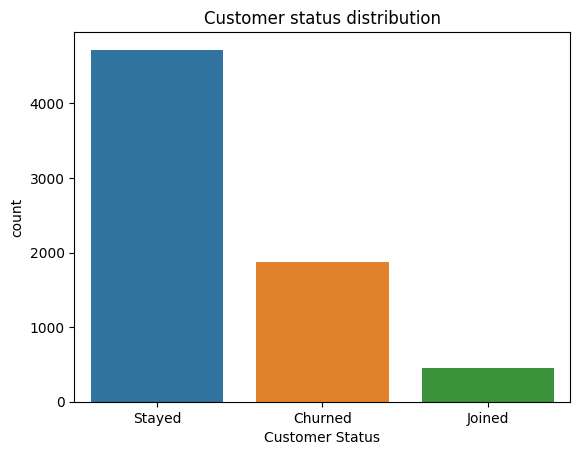

In [ ]:
ax = sns.countplot(df, x = 'Customer Status' ,hue = 'Customer Status')
ax.set_title('Customer status distribution')
plt.show()

In [ ]:
df.groupby(['Customer Status']).size()

Customer Status
Churned    1869
Joined      454
Stayed     4720
dtype: int64

In [ ]:
df.groupby(['Customer Status']) ['Total Revenue'].sum()

Customer Status
Churned     3684459.82
Joined        54279.75
Stayed     17632392.12
Name: Total Revenue, dtype: float64

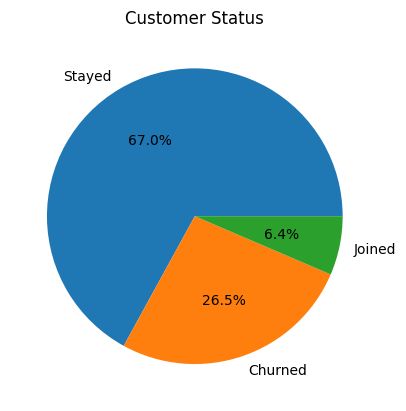

In [ ]:
Customer_status = df['Customer Status']
Customer_counts =  Customer_status.value_counts()
plt.pie(Customer_counts, labels=Customer_counts.index, autopct="%1.1f%%")
plt.title('Customer Status')
plt.show()

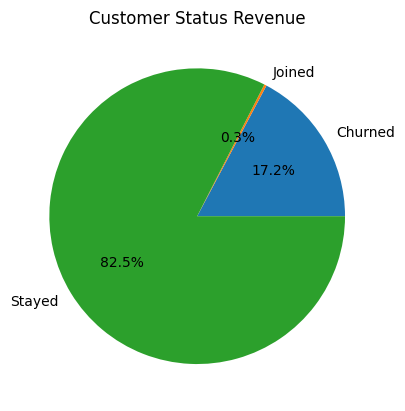

In [ ]:
Customer_status = df['Customer Status']
Total_Revenue = df['Total Revenue']
Customer_revenue =  Total_Revenue.sum()
status_rev = df.groupby('Customer Status')['Total Revenue'].sum()
plt.pie(status_rev, labels=status_rev.index, autopct="%1.1f%%")
plt.title('Customer Status Revenue')
plt.show()

In [ ]:
# **INSIGHT**
#
# **1. Here we can clearly see that only 6.4% out of total customer are joined and it's bringing only 0.3% of total revenue.**
#
# **2. we can drop the 'joined' customer or merge it with 'stayed' for better visulization and convert it into typical classification problem.**
#
# **3. I am dropping the all joined.**

In [ ]:
df = df[df["Customer Status"]!= "Joined"]
len(df)

6589

In [ ]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


# # 4. Identify Causes for Churning

Text(0.5, 1.0, 'Churn Category distribution')

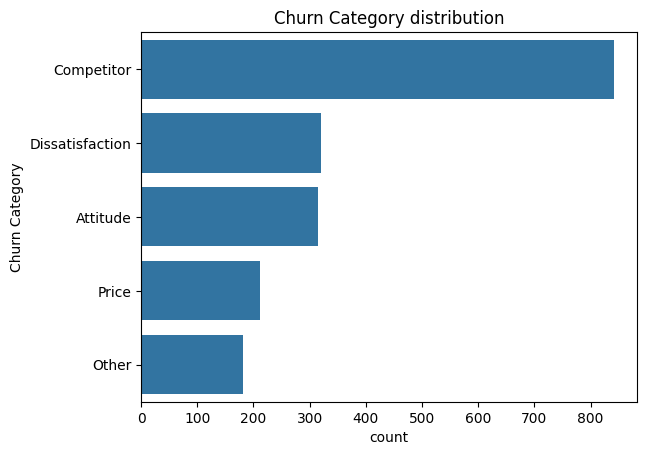

In [ ]:
ax = sns.countplot(df, y = 'Churn Category',order = df['Churn Category'].value_counts().index)
ax.set_title('Churn Category distribution')

Text(0.5, 1.0, 'Churn Reason distribution')

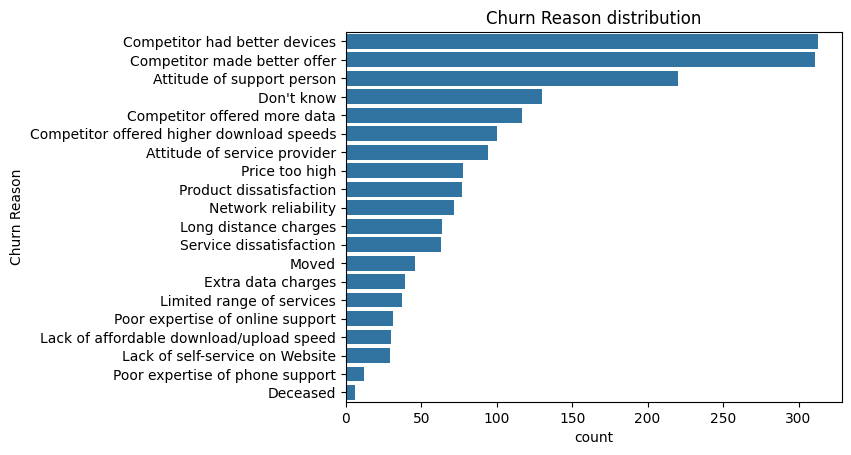

In [ ]:
ax = sns.countplot(df, y = 'Churn Reason',order = df['Churn Reason'].value_counts().index)
ax.set_title('Churn Reason distribution')

In [ ]:
# INSIGHT
#
# 1.Most of the customer are churnig due to competitor because they have better device and better offer
#
# 2. Attitude of support person is also a big reason behind churning this company need to improve it

In [ ]:
#dropping the uneccessary data for anlysis
df = df.drop(['Churn Category','Churn Reason','Customer ID', 'City'],axis=1)

# # 5.Numerical Analysis

In [ ]:
df_num = df.select_dtypes('number')
df_object = df.select_dtypes('object')

In [ ]:
cat  = list(df.select_dtypes(include='object').columns)
num = list(df.select_dtypes(exclude='object').columns)

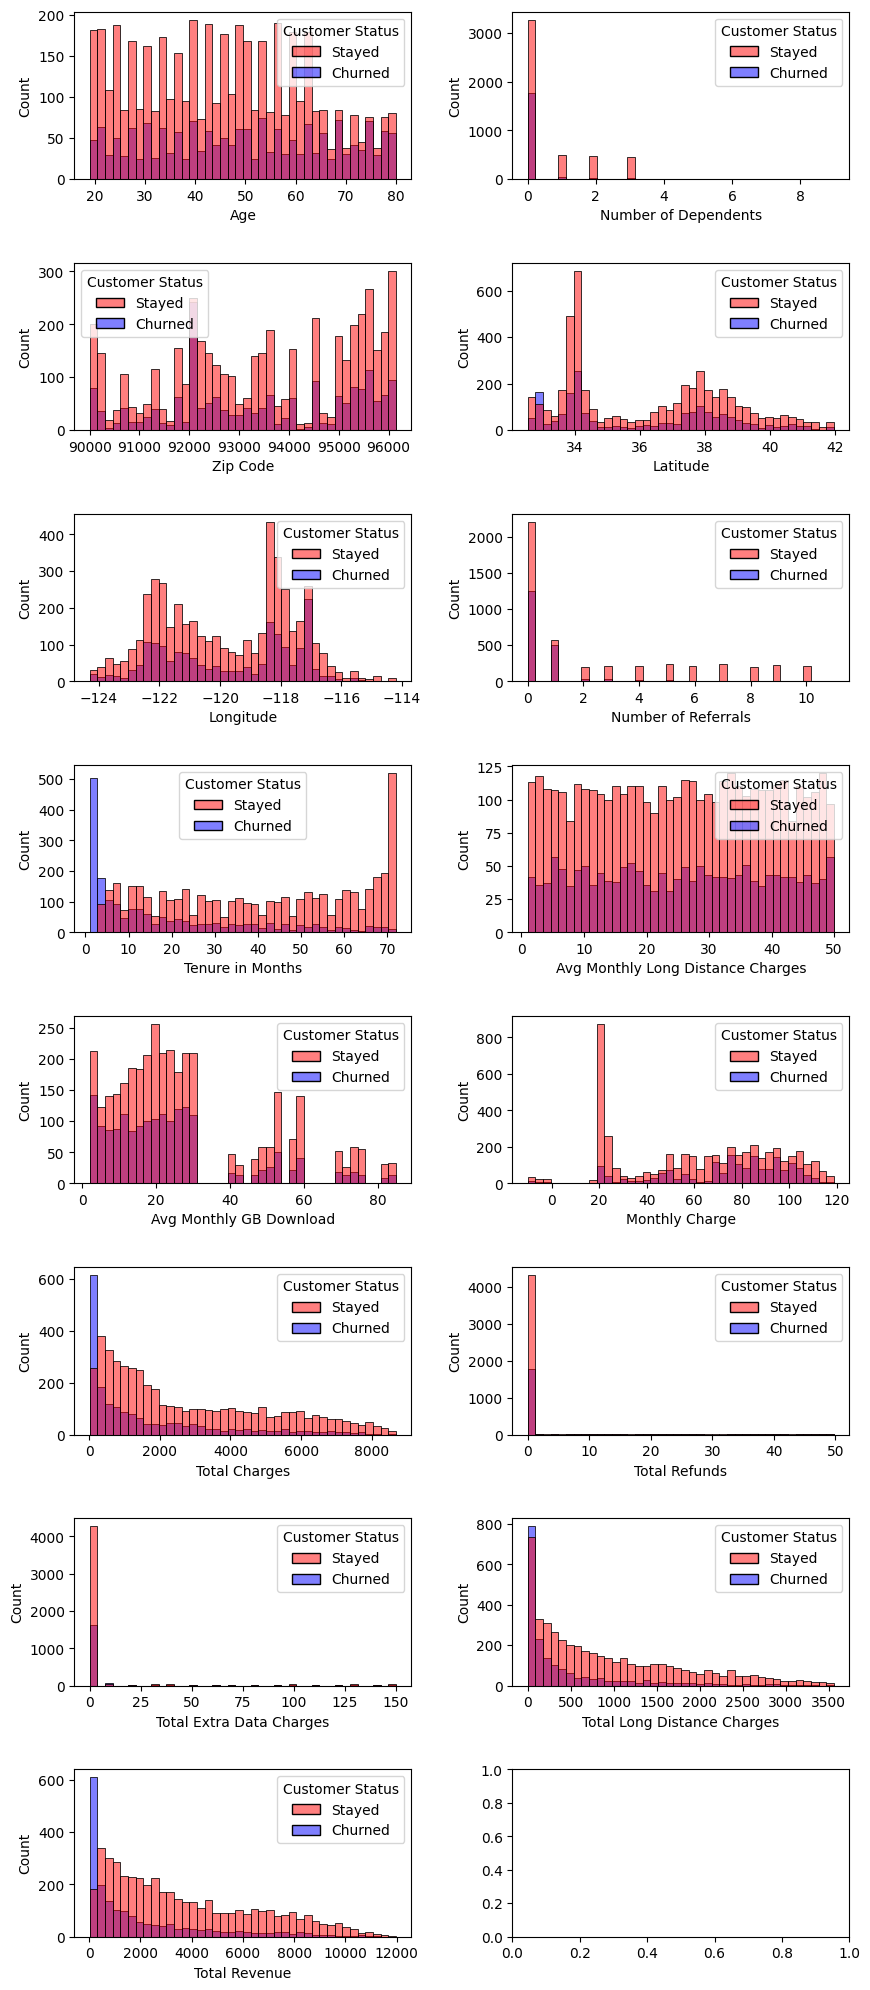

In [ ]:
fig, axes = plt.subplots(8,2, figsize=(10,25))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
axes = axes.flatten()
for i in range(len(num)):
    sns.histplot(x = df[num[i]], hue = df['Customer Status'], palette = ["red","blue"], bins = 40,ax=axes[i])


In [ ]:
# **INSIGHT**
#
# **We can notice that 3 features here strongly influence the churn rate**
#
# **Tenure in Months : A customer is more likely to churn in the first 4 months since he joined**
#
# **Total Charges We can notice that the amount of Total charge for churn customers is significantly lower than the Stayed in customers
# Total Revenue**
#
# **people having zero referral are churning**
#

# This plot shows that the features 'Avg Monthly GB Download', 'Total Refunds', 'Number of Dependents', 'Number of Referrals' and 'Total Extra Data Charges' need to be further analysed

<Axes: >

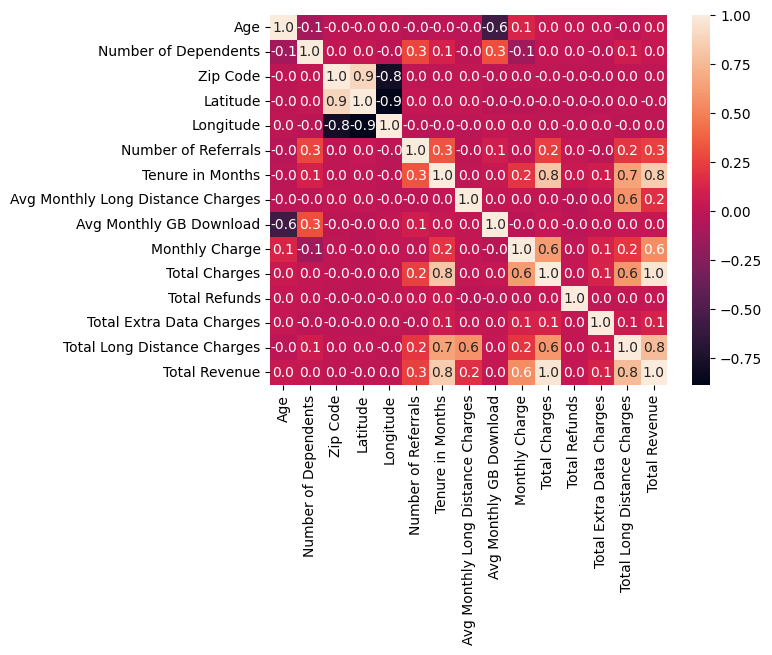

In [ ]:
#creating a heatmap for correlation
sns.heatmap(df[num].corr(), annot = True,fmt='.1f')

In [ ]:
# **INSIGHT**
#
# **Based on the correlation maps we can say Total Charges and Total Long Distance Charges being highly correlated with Total Revenue**
#
# **Tenure in month is highly correlated with total charge and total revenue**
#
# **Monthly charge is correlated to age**
#

# # 5.1 Avg Monthly GB Download:

<Axes: >

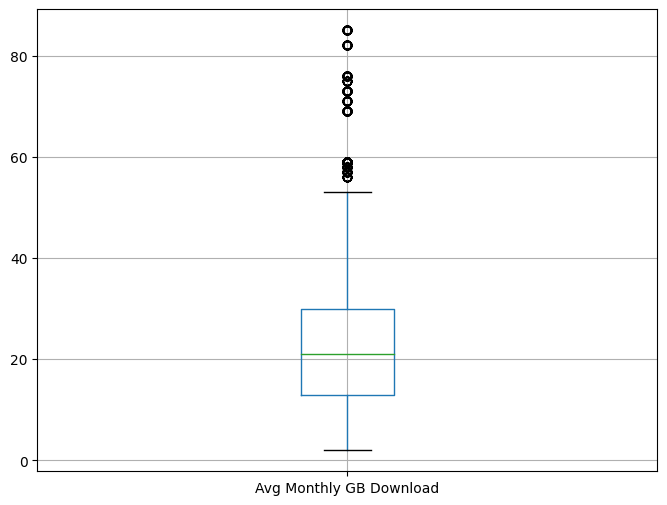

In [ ]:
df_num[['Avg Monthly GB Download']].boxplot(figsize=(8,6))

In [ ]:

#converting age into a range
bins = [19,30,45,60,80]
names = ['19-30','30-45','45-60','60-80']
df_object['AgeRange'] = pd.cut(df['Age'],bins, labels=names,include_lowest=True)

<Figure size 1600x1400 with 0 Axes>

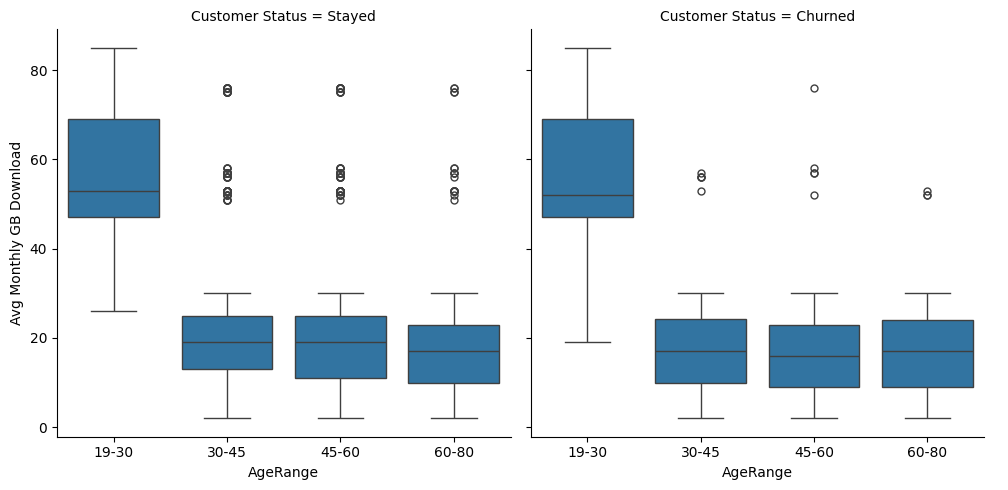

In [ ]:
plt.figure(figsize=(16,14))
sns.catplot(data=df_object.join(df_num),x='AgeRange',y='Avg Monthly GB Download', col ='Customer Status',kind='box')


In [ ]:
# **younger people have by far the highest download flow than the other age groups**


# # 5.2 Total Extra Data Charges, Number of Dependents, Total Refunds and Number of Referrals


In [ ]:

df['Total Extra Data Charges'].value_counts()

Total Extra Data Charges
0      5905
10      113
40       61
30       52
20       48
80       47
100      44
150      42
50       41
130      40
140      38
90       35
110      32
60       32
70       31
120      28
Name: count, dtype: int64

In [ ]:
df['Number of Dependents'].value_counts()

Number of Dependents
0    5042
1     526
2     506
3     491
5       9
4       8
6       3
7       2
9       1
8       1
Name: count, dtype: int64

In [ ]:
df['Total Refunds'].value_counts()


Total Refunds
0.00     6069
46.07       2
8.74        2
1.31        2
5.73        2
         ... 
44.81       1
12.59       1
31.90       1
12.07       1
10.20       1
Name: count, Length: 496, dtype: int64

In [ ]:
df['Number of Referrals'].value_counts()

Number of Referrals
0     3448
1     1071
5      255
3      247
7      243
4      233
2      229
9      226
10     215
6      214
8      206
11       2
Name: count, dtype: int64

In [ ]:
pd.concat([df['Total Extra Data Charges'].value_counts(normalize=True).reset_index(),df['Number of Dependents'].value_counts(normalize=True).reset_index(),
          df['Total Refunds'].value_counts(normalize=True).reset_index(),df['Number of Referrals'].value_counts(normalize=True).reset_index()],axis=1).rename(columns={'index':'value'})


,Total Extra Data Charges,proportion,Number of Dependents,proportion,Total Refunds,proportion,Number of Referrals,proportion
0,0.0,0.896191,0.0,0.765215,0.00,0.921081,0.0,0.523296
1,10.0,0.017150,1.0,0.079830,46.07,0.000304,1.0,0.162544
2,40.0,0.009258,2.0,0.076795,8.74,0.000304,5.0,0.038701
3,30.0,0.007892,3.0,0.074518,1.31,0.000304,3.0,0.037487
4,20.0,0.007285,5.0,0.001366,5.73,0.000304,7.0,0.036880
...,...,...,...,...,...,...,...,...
491,NaN,NaN,NaN,NaN,44.81,0.000152,NaN,NaN
492,NaN,NaN,NaN,NaN,12.59,0.000152,NaN,NaN
493,NaN,NaN,NaN,NaN,31.90,0.000152,NaN,NaN
494,NaN,NaN,NaN,NaN,12.07,0.000152,NaN,NaN


In [ ]:
#Proportion means propertion of each value relative to total number of occurance in the respective columns.
#it give us the normalized view of freq of each value within  its respective column.
#for example
# proportion of 10 = freq of 10/total freq


# 'Total Refunds', 'Number of Dependents', 'Number of Referrals' and 'Total Extra Data Charges' are mostly populated by zero values
#


# # 6. CATEGORICAL ANALYSIS WITHOUT HANDLING MISSING VALUE

In [ ]:
# I did it just for analysing how it will change after handling missing value

In [ ]:
df_object = df.select_dtypes('object')


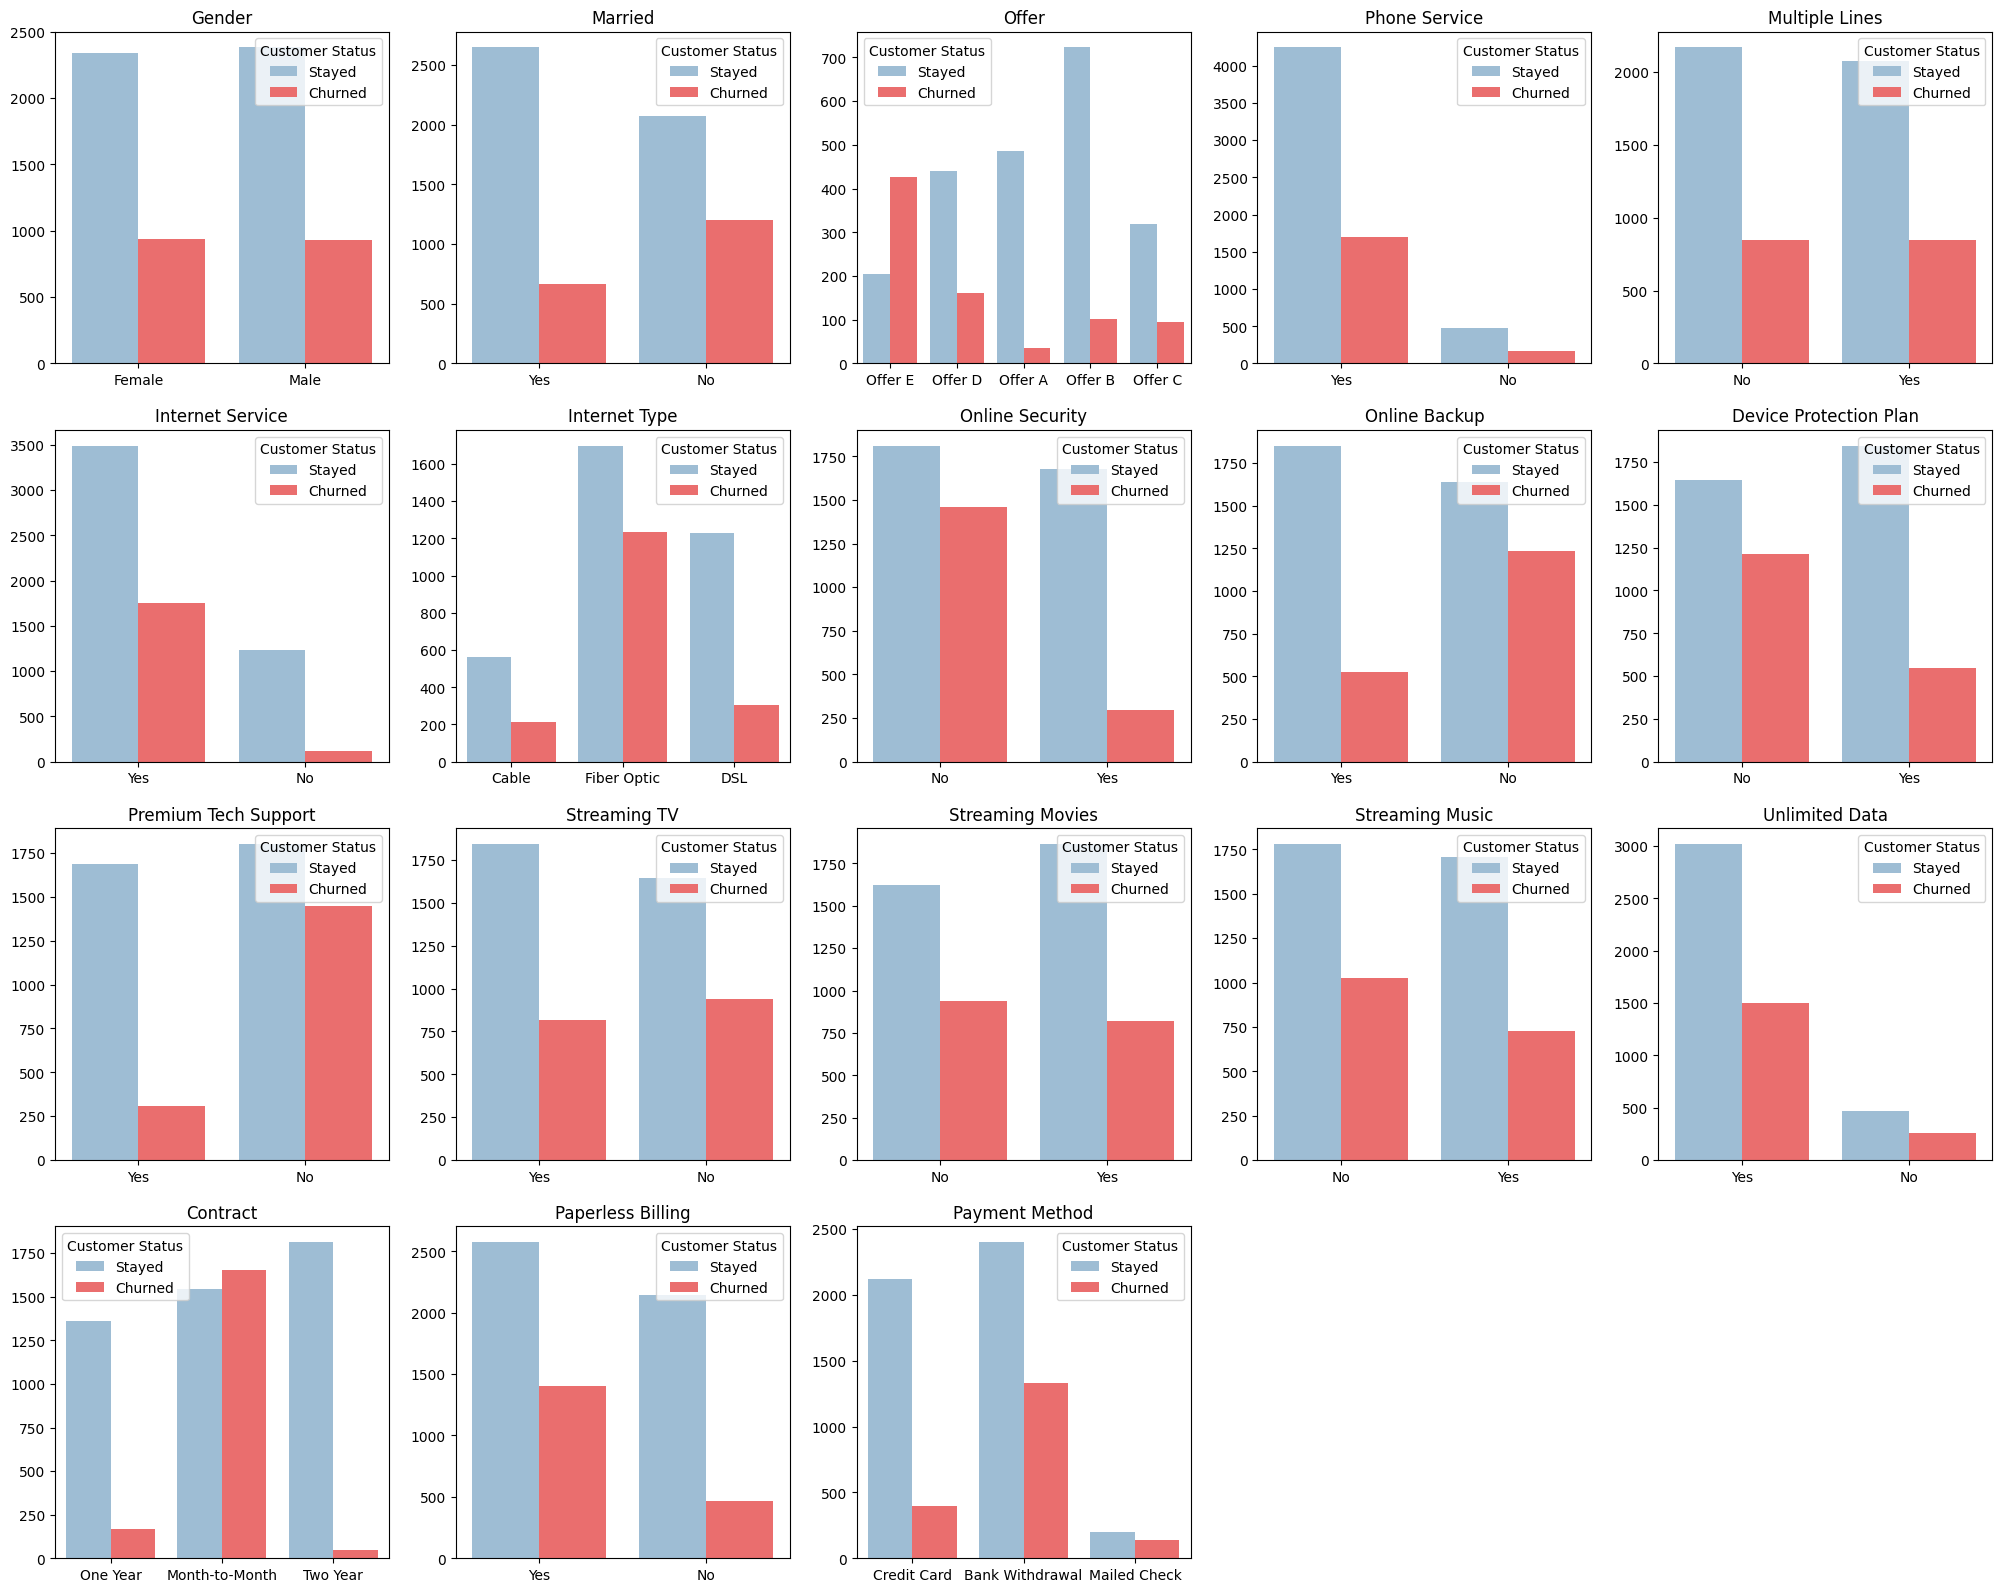

In [ ]:
fig = plt.figure(figsize = (25, 25))
data_cat=df[cat]
i=1
for x in cat[:-1]:
    plt.subplot(5, 5, i)
    ax=sns.countplot(data =data_cat , x = data_cat[x], hue ='Customer Status', palette = ["#95BEDD", '#FF5959'])
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(x), loc='center')
    i+=1
plt.show()

In [ ]:
# Married people tend to stay loyal to the company
#
# People subscribing the offer "E" are likely to churn
#
# offer A is performing very good
#
#
# People not having internet service are more likely to churn compared to people who do not hav it.
#
# t
# People not having online security, online Backup, Device Protection Plan and Premium Tech Support are more likely to churn than people who havie.
#
# em
# People not having dependents living with them are more likely to churn compare to people who  **h.ave


# # 6.1 Handling Missing Value

In [ ]:
df_object = df.select_dtypes('object')

In [ ]:
df_object.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6589 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  6589 non-null   object
 1   Married                 6589 non-null   object
 2   Offer                   2991 non-null   object
 3   Phone Service           6589 non-null   object
 4   Multiple Lines          5945 non-null   object
 5   Internet Service        6589 non-null   object
 6   Internet Type           5245 non-null   object
 7   Online Security         5245 non-null   object
 8   Online Backup           5245 non-null   object
 9   Device Protection Plan  5245 non-null   object
 10  Premium Tech Support    5245 non-null   object
 11  Streaming TV            5245 non-null   object
 12  Streaming Movies        5245 non-null   object
 13  Streaming Music         5245 non-null   object
 14  Unlimited Data          5245 non-null   object
 15  Contract 

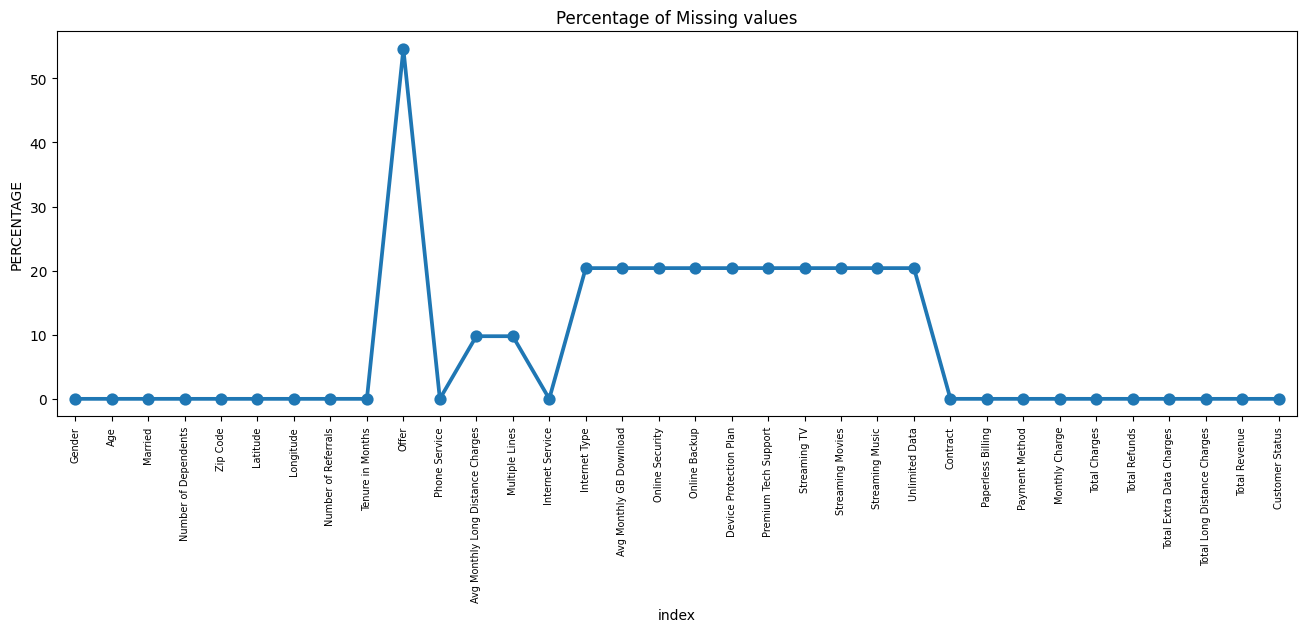

In [ ]:
#code to calculte percentage of missing value and plot them
missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [ ]:
df_object['Internet Service'].value_counts()

Internet Service
Yes    5245
No     1344
Name: count, dtype: int64

In [ ]:
df_object.join(df_num)[['Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan',
           'Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music','Unlimited Data','Avg Monthly GB Download']].isna().sum()


Internet Type              1344
Online Security            1344
Online Backup              1344
Device Protection Plan     1344
Premium Tech Support       1344
Streaming TV               1344
Streaming Movies           1344
Streaming Music            1344
Unlimited Data             1344
Avg Monthly GB Download    1344
dtype: int64

In [ ]:
# The number of Nan values is equal to number of NO values in 'Internet Service' thereby suggesting that Nan are not missing values



In [ ]:
df_object[['Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan',
           'Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music','Unlimited Data']] = df_object[['Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan',
           'Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music','Unlimited Data']].replace(np.nan,'No Internet')
df_num['Avg Monthly GB Download'] = df_num['Avg Monthly GB Download'].replace(np.nan,0.0)
df_object[['Offer']] = df_object[['Offer']].replace(np.nan,'Not Any')

In [ ]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6589 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  6589 non-null   object
 1   Married                 6589 non-null   object
 2   Offer                   6589 non-null   object
 3   Phone Service           6589 non-null   object
 4   Multiple Lines          5945 non-null   object
 5   Internet Service        6589 non-null   object
 6   Internet Type           6589 non-null   object
 7   Online Security         6589 non-null   object
 8   Online Backup           6589 non-null   object
 9   Device Protection Plan  6589 non-null   object
 10  Premium Tech Support    6589 non-null   object
 11  Streaming TV            6589 non-null   object
 12  Streaming Movies        6589 non-null   object
 13  Streaming Music         6589 non-null   object
 14  Unlimited Data          6589 non-null   object
 15  Contract 

In [ ]:
df_object['Phone Service'].value_counts()

Phone Service
Yes    5945
No      644
Name: count, dtype: int64

In [ ]:
df_object['Multiple Lines'].isna().sum()

644

In [ ]:
df_num['Avg Monthly Long Distance Charges'].isna().sum()


644

In [ ]:
df_object[df_object['Multiple Lines'].isna()]

,Gender,Married,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status
10,Male,No,Not Any,No,NaN,Yes,Cable,Yes,No,No,Yes,Yes,No,No,Yes,Two Year,No,Credit Card,Stayed
14,Female,No,Not Any,No,NaN,Yes,DSL,Yes,Yes,Yes,Yes,No,No,No,Yes,Two Year,No,Bank Withdrawal,Stayed
16,Female,Yes,Not Any,No,NaN,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,No,Credit Card,Stayed
19,Male,No,Not Any,No,NaN,Yes,Cable,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Churned
25,Female,Yes,Not Any,No,NaN,Yes,DSL,Yes,No,No,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6979,Female,No,Offer B,No,NaN,Yes,Cable,No,Yes,Yes,No,Yes,Yes,No,Yes,Two Year,Yes,Bank Withdrawal,Stayed
6980,Female,No,Offer E,No,NaN,Yes,DSL,No,No,No,No,No,No,No,Yes,Month-to-Month,No,Credit Card,Churned
6996,Female,No,Offer D,No,NaN,Yes,DSL,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,Stayed
7016,Male,Yes,Not Any,No,NaN,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,Stayed


In [ ]:
# Nan values associated to the variable 'Multiple Lines' are due to the fact that the customer is not subscribed to home phone service


In [ ]:
df_object['Multiple Lines'] = df_object['Multiple Lines'].replace(np.nan,'NO phone Service')
df_num['Avg Monthly Long Distance Charges'] = df_num['Avg Monthly Long Distance Charges'].replace(np.nan,0.0)


# # 6.2 DATA WITHOUT ANY MISSING VALUE

In [ ]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6589 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  6589 non-null   object
 1   Married                 6589 non-null   object
 2   Offer                   6589 non-null   object
 3   Phone Service           6589 non-null   object
 4   Multiple Lines          6589 non-null   object
 5   Internet Service        6589 non-null   object
 6   Internet Type           6589 non-null   object
 7   Online Security         6589 non-null   object
 8   Online Backup           6589 non-null   object
 9   Device Protection Plan  6589 non-null   object
 10  Premium Tech Support    6589 non-null   object
 11  Streaming TV            6589 non-null   object
 12  Streaming Movies        6589 non-null   object
 13  Streaming Music         6589 non-null   object
 14  Unlimited Data          6589 non-null   object
 15  Contract 

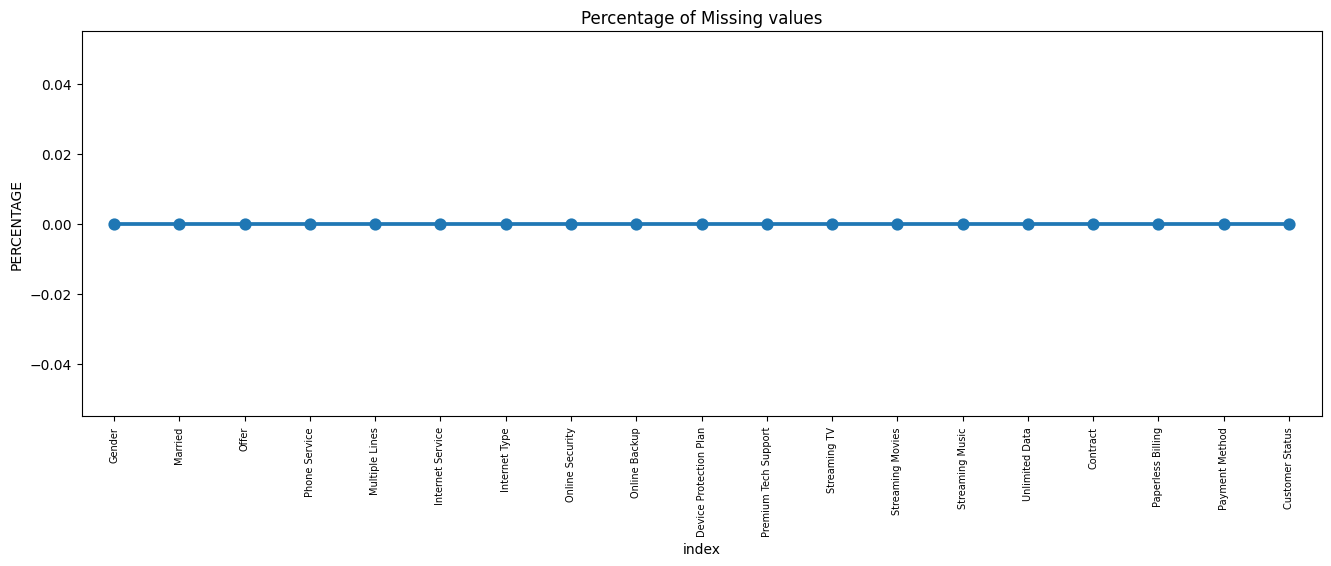

In [ ]:
#visualization for missing value
missing = pd.DataFrame((df_object.isnull().sum()) * 100 / df.shape[0]).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

# # 6.3 categorical analysis after handling missing value

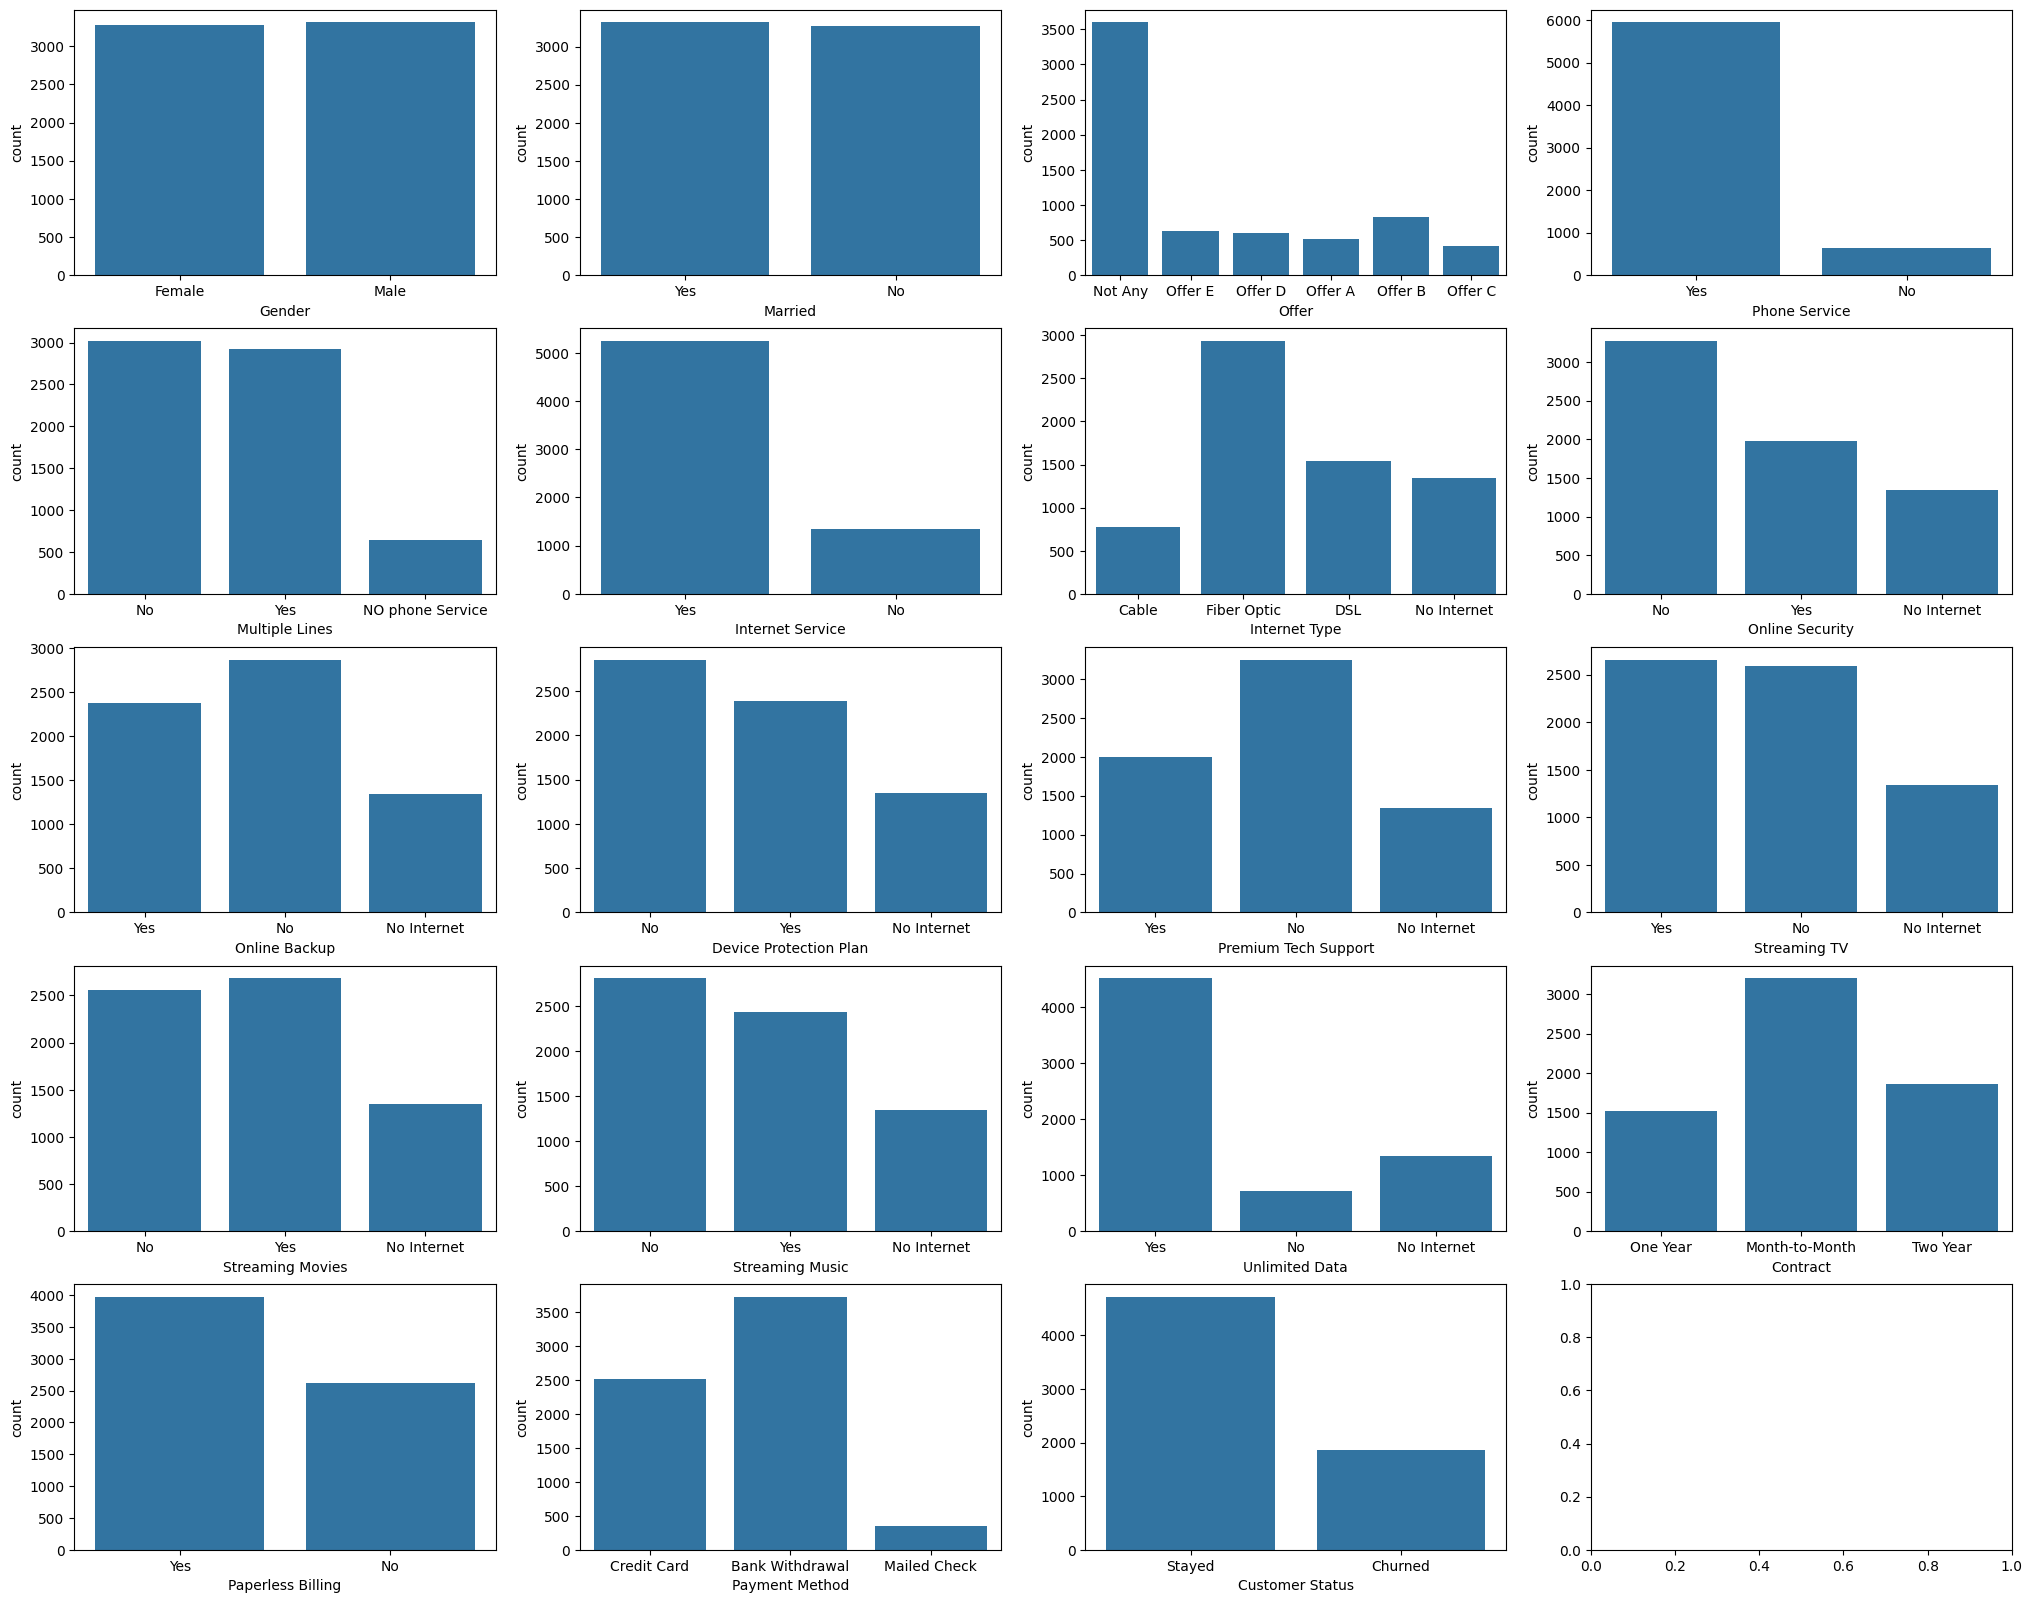

In [ ]:
#COUNT OF EACH CATEGORY
fig, axes = plt.subplots(5,4,figsize=(25,20))
for i,col in enumerate(df_object.columns):
    sns.countplot(data=df_object,x=col,ax=axes.flat[i])

In [ ]:
#Visulization of all category
i=0
fig,axes=plt.subplots(9,2,figsize=(15,75))
for col in df_object.columns:
    if col != 'Customer Status':
        pd.crosstab(df_object[col],df_object['Customer Status']).plot(kind='bar',ax=axes.flat[i])
        i+=1

In [ ]:
# According to the plots:
#
# Married people tend to stay loyal to the company
#
# People subscribing the offer "E" are likely to churn
#
# People not having internet service are more likely to churn compared to people who do not have it
#
# People not having online security, online Backup, Device Protection Plan and Premium Tech Support are more likely to churn than people who have them
#
# People not having dependents living with them are more likely to churn compare to people who do have

In [ ]:
df_object = pd.get_dummies(df_object).astype(int)
df_object.head()



In [ ]:
#heat map for all categorical data after making it in dummy variable
plt.figure(figsize=(12,12))
sns.heatmap(df_object.corr(), cmap="Paired")

# # 7. Data cleaning for the purpose of modeling

In [ ]:
df1.info()


In [ ]:
#data cleaning as per EDA anlysis and what is required for modeling
df1[['Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan',
           'Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music','Unlimited Data']] = df1[['Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan',
           'Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music','Unlimited Data']].replace(np.nan,'No Internet')
df1['Avg Monthly GB Download'] = df1['Avg Monthly GB Download'].replace(np.nan,0.0)
df1['Multiple Lines'] = df1['Multiple Lines'].replace(np.nan,'NO phone Service')
df1['Offer'] = df1['Offer'].replace(np.nan,'Not any')
df1['Avg Monthly Long Distance Charges'] = df1['Avg Monthly Long Distance Charges'].replace(np.nan,0.0)


In [ ]:
#df1 is copy of df which i did earlier in start of coding
df1.info()

In [ ]:
#droping joined from dataset
df1 = df1[df1["Customer Status"]!= "Joined"]

In [ ]:
#droping all unneccessary coloumn
df1 = df1.drop(['Churn Category','Churn Reason', 'City','Latitude', 'Longitude','Zip Code'],axis=1)


In [ ]:
df1.info()

# # 7.1 Outlier detection and removing

In [ ]:
##outlier detection using 3- sigma rule
num = df1.select_dtypes(exclude = 'object').columns
df1['outlier'] = 'no'
for name in num:
    upper_limit = df1[name].mean() + 3*(df1[name].std())
    lower_limit = df1[name].mean() - 3*(df1[name].std())
    if (df1[name] < lower_limit).any() or (df1[name] > upper_limit).any():
        df1.loc[(df1[name] < lower_limit) | (df1[name] > upper_limit), ['outlier']] = [f'{name}_outlier']
df1
outlier = df1.loc[df1['outlier'] != 'no']
outlier

In [ ]:
ax = sns.countplot(outlier, x='Customer Status')
ax.bar_label(ax.containers[0])
ax.set(title = 'contain outlier amounts in each customer status ')

In [ ]:
# outlier in each category and in each customer status
outlier.groupby(['outlier','Customer Status'])[['Customer ID']].count().rename(columns= {'Customer ID':'count'})



In [ ]:
df1 = df1[df1['outlier'] == 'no']

In [ ]:

df1['Churn'] = np.where(df1['Customer Status'] == 'Stayed',1,0)

In [ ]:
df1.info()

In [ ]:
df1 = df1.drop(['outlier','Customer ID','Churn'],axis=1)

In [ ]:
df1.info()

# # 8.Encode categorical data

In [ ]:
df1.head()

In [ ]:
df1['Customer Status']  = df1['Customer Status'].replace({'Stayed':1,'Churned':0})

In [ ]:
df1

# # 9.1 creating dummy variable and droping one dummy variable to remove dummy trap

In [ ]:
df1 = pd.get_dummies(df1,drop_first=True).astype(int)

In [ ]:
df1

In [ ]:
X = df1.drop('Customer Status',axis=1)
y = df1['Customer Status']

In [ ]:
X

In [ ]:
y

In [ ]:
df1['Customer Status'].value_counts()

# # 10.Handling imbalance data

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [ ]:
y_res.value_counts()

# # 11. Split into test and traning data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

# # 12.Standard scaling of data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

In [ ]:
X_test

# # 13.using logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression()

In [ ]:
log.fit(X_train,y_train)

In [ ]:
y_pred1 = log.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred1)

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
precision_score(y_test,y_pred1)

In [ ]:
recall_score(y_test,y_pred1)

In [ ]:
f1_score(y_test,y_pred1)

# # 14.using svm classifier

In [ ]:
from sklearn import svm

In [ ]:
svm = svm.SVC()

In [ ]:
svm.fit(X_train,y_train)

In [ ]:
y_pred2 = svm.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred2)

In [ ]:
precision_score(y_test,y_pred2)

In [ ]:
recall_score(y_test,y_pred2)

# # 15. using kNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
y_pred3 = knn.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred3)

In [ ]:
precision_score(y_test,y_pred3)

In [ ]:
recall_score(y_test,y_pred3)

# # 16.using dicision classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)

In [ ]:
y_pred4 = dt.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred4)

In [ ]:
precision_score(y_test,y_pred4)

In [ ]:
recall_score(y_test,y_pred4)

# # 17.Using random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

In [ ]:
y_pred5 = rf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred5)

In [ ]:
precision_score(y_test,y_pred5)

In [ ]:
recall_score(y_test,y_pred5)

# # 18.using GB Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()

In [ ]:
gbc.fit(X_train,y_train)

In [ ]:
y_pred6 = gbc.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred6)

In [ ]:
precision_score(y_test,y_pred6)

In [ ]:
recall_score(y_test,y_pred6)

# # 19. comparing accuracy of all

In [ ]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                        'ACC':[accuracy_score(y_test,y_pred1),
                              accuracy_score(y_test,y_pred2),
                              accuracy_score(y_test,y_pred3),
                              accuracy_score(y_test,y_pred4),
                              accuracy_score(y_test,y_pred5),
                              accuracy_score(y_test,y_pred6)]})

In [ ]:
final_data

In [ ]:
import seaborn as sns

In [ ]:
sns.barplot(data=final_data, x='Models', y='ACC')


# # 20. comparing precision value for all

In [ ]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                        'PRE':[precision_score(y_test,y_pred1),
                              precision_score(y_test,y_pred2),
                              precision_score(y_test,y_pred3),
                              precision_score(y_test,y_pred4),
                              precision_score(y_test,y_pred5),
                              precision_score(y_test,y_pred6)]})

In [ ]:
final_data

In [ ]:

sns.barplot(data=final_data, x='Models', y='PRE')

# # 21.ROC graph of RFC

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_sklearn_roc_curve(y_test, y_pred5):
    fpr, tpr, _ = roc_curve(y_test, y_pred5)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(2,2)
    plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods - Good plot
plot_sklearn_roc_curve(y_test, y_pred5)
# Plots the ROC curve using the sklearn methods - Bad plot
#plot_sklearn_roc_curve(y_test, y_pred)

# # 22. save the model

In [ ]:
X_res=rf.fit(X_train,y_train)

In [ ]:
X.columns

In [ ]:
row_to_save = X.iloc[0].tolist()

In [ ]:
print(row_to_save)

In [ ]:
prediction = X_res.predict([[3, 0, 2, 9, 2, 5, 65, 53, 0, 0, 381, 974, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0]])
if prediction == 1:
    print("stayed")
else:
    print("Churned")